In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import random

In [11]:
class RandomApply(nn.Module):
    def __init__(self, fn, p):
        super().__init__()
        self.fn = fn
        self.p = p

    def forward(self, x):
        if random.random() > self.p:
            return x
        return self.fn(x)

class AugmentationTrajectoryGenerator:
    def __init__(self, batch_size, trajectory_length, image_shape, output_shape):
        self.batch_size = batch_size
        self.trajectory_length = trajectory_length
        self.image_shape = image_shape
        self.output_shape = output_shape

        self.augment = nn.Sequential(
            RandomApply(transforms.ColorJitter(0.8, 0.8, 0.8, 0.2), p=0.3),
            transforms.RandomGrayscale(p=0.2),
            transforms.RandomHorizontalFlip(),
            RandomApply(transforms.GaussianBlur((3, 3), (1.0, 2.0)), p=0.2),
            transforms.RandomResizedCrop((self.output_shape[1], self.output_shape[2])),
        )

    def generate_trajectories(self, images):
        augmented_images = (
            torch.zeros(self.batch_size, *self.output_shape)
            .unsqueeze(1)
            .repeat(1, self.trajectory_length, 1, 1, 1)
        )
        for i, image in enumerate(images):
            for view in range(self.trajectory_length):
                augmented_image = self.augment(image)
                augmented_images[i, view, :, :, :] = augmented_image
        crop_coordinates = None
        return augmented_images, crop_coordinates

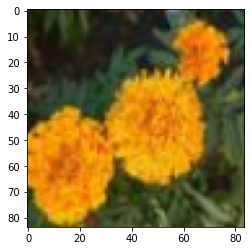

In [32]:
image=torch.tensor(plt.imread('/Users/ajelley/Downloads/complete_test0.png'))
plt.imshow(image)

torch.Size([403, 666, 3])
(tensor([2, 0, 3, 1]), 61.63414001464844, 99.85889434814453, 74.42790222167969, 0.036410510540008545)


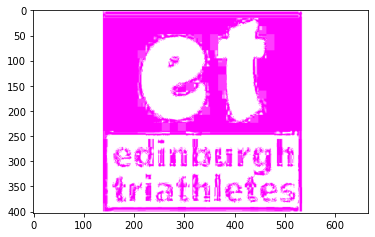

In [56]:
print(image.shape)
blur=transforms.ColorJitter(0,0,0,0)
params=blur.get_params((0,100),(0,100),(0,100),(-0.5,0.5))
print(params)
blurred_image = transforms.functional.adjust_brightness(image.permute(2,0,1), params[1])
plt.imshow(blurred_image.permute(1,2,0))

In [35]:
image=image.permute(2,0,1)
generator=AugmentationTrajectoryGenerator(batch_size=1, trajectory_length=20, image_shape=image.shape, output_shape=image.shape)

In [36]:
augmented_images, crop_coordinates=generator.generate_trajectories(image.unsqueeze(0))

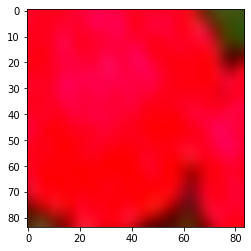

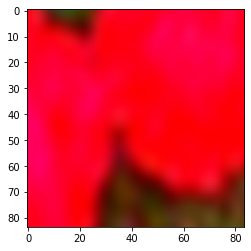

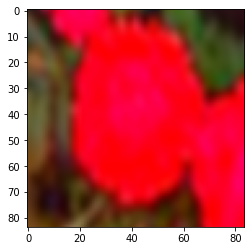

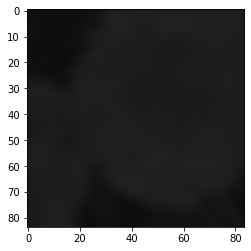

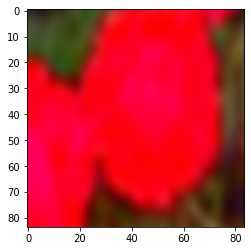

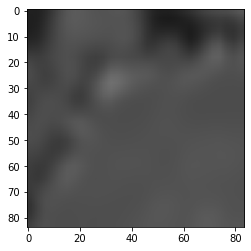

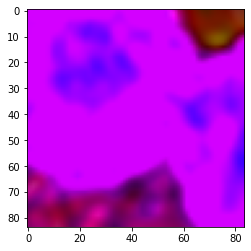

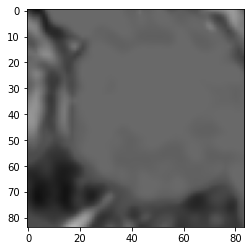

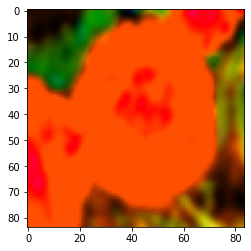

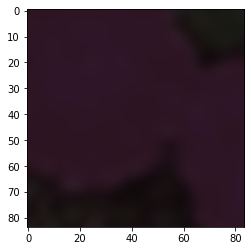

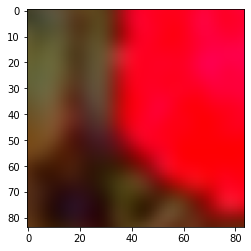

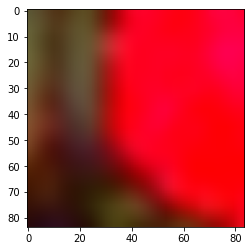

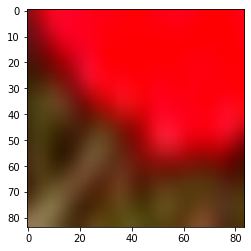

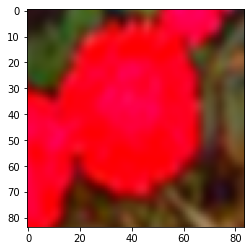

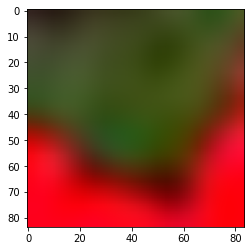

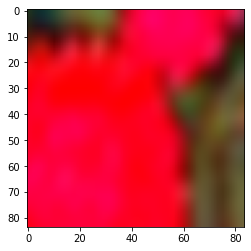

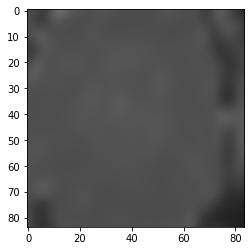

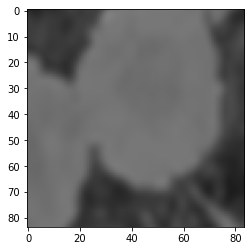

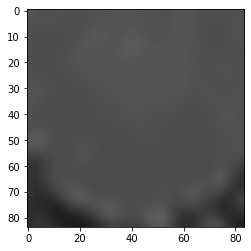

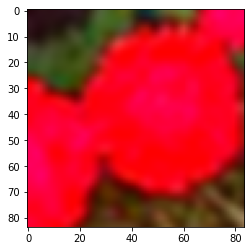

In [37]:
for image in augmented_images.squeeze(0):
    image=image.permute(1,2,0)
    plt.imshow(image)
    plt.show()

In [5]:
a=torch.randn(2,3,4,5)
a[0,0,:,:]

tensor([[-0.9564,  0.1089,  0.2953, -1.5872, -1.0014],
        [-0.1672,  0.8111, -0.9085, -0.1883,  0.8364],
        [ 0.2901, -0.1298,  0.6179,  1.1756, -0.8903],
        [-0.9054,  1.9494,  1.2019, -1.3264, -0.9650]])